<a href="https://colab.research.google.com/github/data-tamer2410/ds-sentiment-analysis-with-rnn/blob/main/sentiment_analysis_with_rnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task.

It is necessary to create a recurrent neural network that will recognize a positive or negative review from the imdb dataset.

# Solving task.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow import keras
from keras.datasets import imdb
from keras.utils import pad_sequences
from keras import layers
from keras.models import Sequential
from keras import optimizers
from keras.callbacks import EarlyStopping
from keras.regularizers import L2
%matplotlib inline

## Data loading and preparation.

In [2]:
max_features = 10000 # Number of words treated as features

(x_train,y_train),(x_test,y_test) = imdb.load_data(num_words=max_features)

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
y_train = y_train.astype('float32')
y_test = y_test.astype('float32')

In [4]:
print(x_train.shape,x_test.shape)

(25000,) (25000,)


In [5]:
# Separation of data into test and validation.
x_test, x_val, y_test, y_val = train_test_split(x_test,y_test,test_size=0.4,random_state=1,stratify=y_test)

In [6]:
maxlen = 500 # Limit the number of words in the text

x_train = pad_sequences(x_train,maxlen=maxlen,dtype='float32')
x_test = pad_sequences(x_test,maxlen=maxlen,dtype='float32')
x_val = pad_sequences(x_val,maxlen=maxlen,dtype='float32')

The IMDB dataset is a collection of 50,000 movie reviews, used for sentiment analysis. It is split into 25,000 reviews for training and 25,000 for testing. The reviews are labeled as either positive or negative. This dataset is commonly used for training models to classify text based on sentiment.

## A regular recurrent neural network.

In [ ]:
# Construction of the model.

output_dim = 150 # The number of values ​​in the vector into which each word will be converted.

model = Sequential([
    layers.Input(shape=(maxlen,)),
    layers.Embedding(input_dim=max_features,output_dim=output_dim),

    layers.SimpleRNN(64,dropout=0.5,kernel_regularizer=L2(0.001)),

    layers.Dense(1,activation='sigmoid',kernel_regularizer=L2(0.001))
])

model.compile(
    optimizer=optimizers.Adam(learning_rate=0.0001),
    loss='binary_crossentropy',
    metrics=['acc'])

model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_3 (Embedding)              │ (None, 500, 150)            │       1,500,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn (SimpleRNN)               │ (None, 64)                  │          13,760 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,513,825 (5.77 MB)

 Trainable params: 1,513,825 (5.77 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Model training.
batch_size = 32
epochs = 100
early_stop = EarlyStopping(monitor='val_acc', patience=5, restore_best_weights=True) # To prevent overtraining, we will use an early stop.

history = model.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    validation_data=(x_val,y_val),
    callbacks=[early_stop]
)

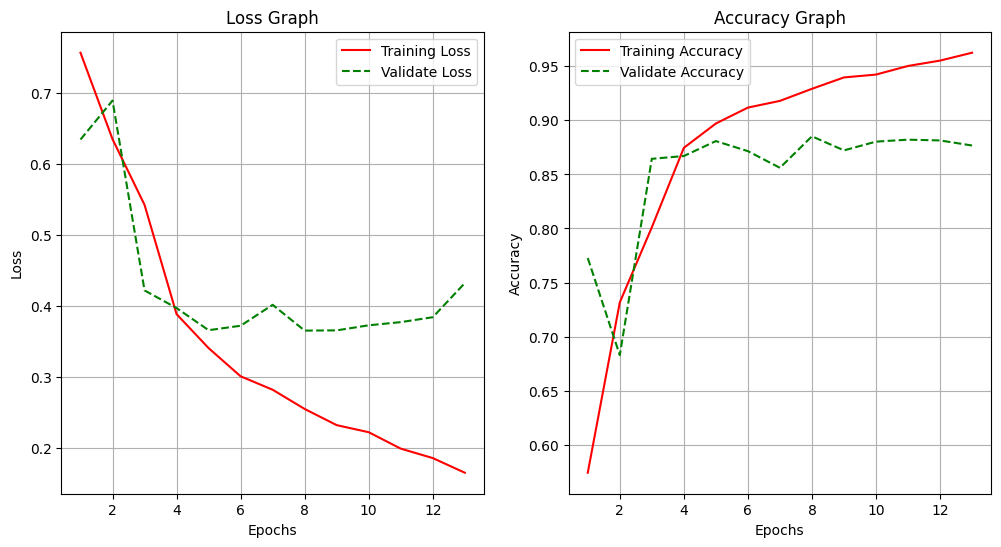

In [ ]:
# Visualization of model training.
history = history.history

x = range(1, len(history['loss']) + 1)

fig, axs = plt.subplots(ncols=2,figsize=(12,6))

axs[0].plot(x,history['loss'],'r',label='Training Loss')
axs[0].plot(x,history['val_loss'],'g--',label='Validate Loss')

axs[0].set_title('Loss Graph')
axs[0].set_ylabel('Loss')
axs[0].set_xlabel('Epochs')
axs[0].legend()
axs[0].grid()

axs[1].plot(x,history['acc'],'r',label='Training Accuracy')
axs[1].plot(x,history['val_acc'],'g--',label='Validate Accuracy')

axs[1].set_title('Accuracy Graph')
axs[1].set_ylabel('Accuracy')
axs[1].set_xlabel('Epochs')
axs[1].legend()
axs[1].grid()

plt.show()

In [25]:
# Model testing.
rnn_scores = model.evaluate(x_test,y_test,return_dict=True)

469/469 ━━━━━━━━━━━━━━━━━━━━ 14s 29ms/step - acc: 0.8809 - loss: 0.3638


In [ ]:
# Model saving.
model.save('./rnn.h5')

## RNN with LSTM layer.

In [ ]:
# Construction of the model.

output_dim = 100 # The number of values ​​in the vector into which each word will be converted.

model = Sequential([
    layers.Input(shape=(maxlen,)),
    layers.Embedding(input_dim=max_features,output_dim=output_dim),

    layers.LSTM(64,dropout=0.6,kernel_regularizer=L2(0.001)),

    layers.Dense(1,activation='sigmoid',kernel_regularizer=L2(0.001))
])

model.compile(
    optimizer=optimizers.RMSprop(learning_rate=0.003),
    loss='binary_crossentropy',
    metrics=['acc'])

model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)              │ (None, 500, 100)            │       1,000,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 64)                  │          42,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,042,305 (3.98 MB)

 Trainable params: 1,042,305 (3.98 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Model training.
batch_size = 64
epochs = 100
early_stop = EarlyStopping(monitor='val_acc', patience=5, restore_best_weights=True) # To prevent overtraining, we will use an early stop.

history = model.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    validation_data=(x_val,y_val),
    callbacks=[early_stop]
)

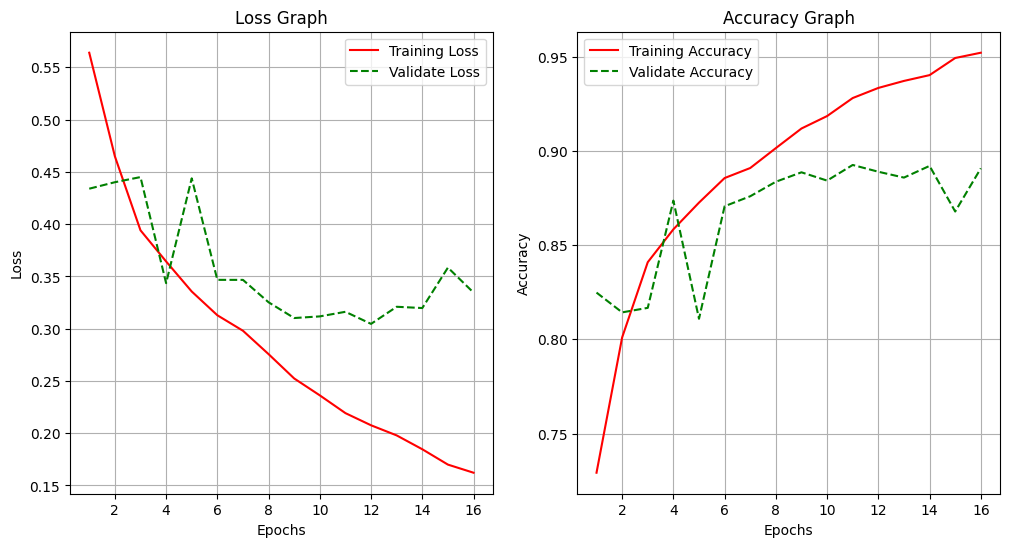

In [ ]:
# Visualization of model training.
history = history.history

x = range(1, len(history['loss']) + 1)

fig, axs = plt.subplots(ncols=2,figsize=(12,6))

axs[0].plot(x,history['loss'],'r',label='Training Loss')
axs[0].plot(x,history['val_loss'],'g--',label='Validate Loss')

axs[0].set_title('Loss Graph')
axs[0].set_ylabel('Loss')
axs[0].set_xlabel('Epochs')
axs[0].legend()
axs[0].grid()

axs[1].plot(x,history['acc'],'r',label='Training Accuracy')
axs[1].plot(x,history['val_acc'],'g--',label='Validate Accuracy')

axs[1].set_title('Accuracy Graph')
axs[1].set_ylabel('Accuracy')
axs[1].set_xlabel('Epochs')
axs[1].legend()
axs[1].grid()

plt.show()

In [28]:
# Model testing.
rnn_lstm_scores = model.evaluate(x_test,y_test,return_dict=True)

469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - acc: 0.8897 - loss: 0.3119


In [ ]:
# Model saving.
model.save('./rnn_lstm.h5')

## BRNN with LSTM layer.

In [ ]:
# Construction of the model.

output_dim = 200 # The number of values ​​in the vector into which each word will be converted.

model = Sequential([
    layers.Input(shape=(maxlen,)),
    layers.Embedding(input_dim=max_features,output_dim=output_dim),

    layers.Bidirectional(layers.LSTM(256,dropout=0.5)),

    layers.Dense(1,activation='sigmoid',kernel_regularizer=L2(0.001))
])

model.compile(
    optimizer=optimizers.RMSprop(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['acc'])

model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_3 (Embedding)              │ (None, 500, 200)            │       2,000,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_3 (Bidirectional)      │ (None, 512)                 │         935,936 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │             513 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,936,449 (11.20 MB)

 Trainable params: 2,936,449 (11.20 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Model training.
batch_size = 32
epochs = 100
early_stop = EarlyStopping(monitor='val_acc', patience=5, restore_best_weights=True) # To prevent overtraining, we will use an early stop.

history = model.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    validation_data=(x_val,y_val),
    callbacks=[early_stop]
)

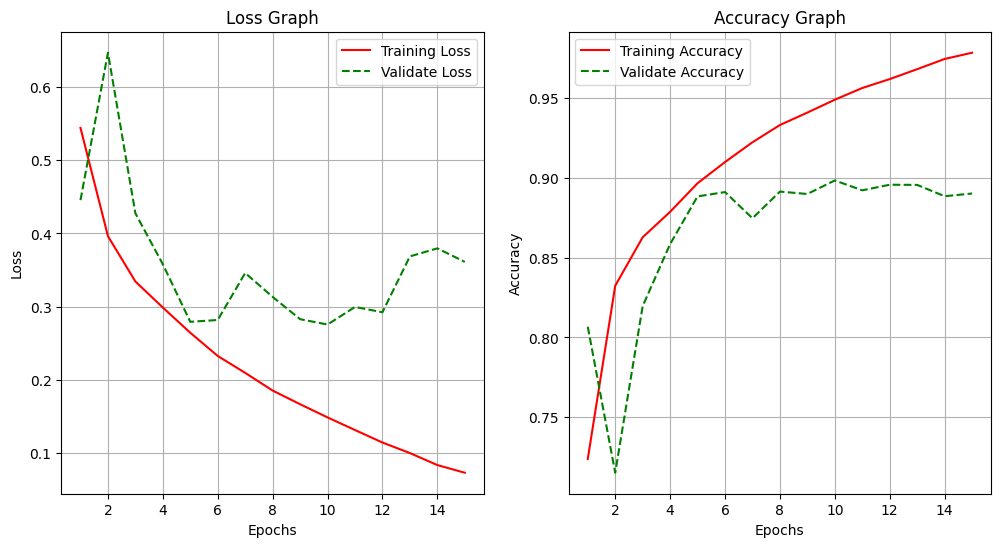

In [ ]:
# Visualization of model training.
history = history.history

x = range(1, len(history['loss']) + 1)

fig, axs = plt.subplots(ncols=2,figsize=(12,6))

axs[0].plot(x,history['loss'],'r',label='Training Loss')
axs[0].plot(x,history['val_loss'],'g--',label='Validate Loss')

axs[0].set_title('Loss Graph')
axs[0].set_ylabel('Loss')
axs[0].set_xlabel('Epochs')
axs[0].legend()
axs[0].grid()

axs[1].plot(x,history['acc'],'r',label='Training Accuracy')
axs[1].plot(x,history['val_acc'],'g--',label='Validate Accuracy')

axs[1].set_title('Accuracy Graph')
axs[1].set_ylabel('Accuracy')
axs[1].set_xlabel('Epochs')
axs[1].legend()
axs[1].grid()

plt.show()

In [30]:
# Model testing.
brnn_lstm_scores = model.evaluate(x_test,y_test,return_dict=True)

469/469 ━━━━━━━━━━━━━━━━━━━━ 13s 26ms/step - acc: 0.8979 - loss: 0.2677


In [ ]:
# Model saving.
model.save('./brnn_lstm.h5')

## Deep BRNN with LSTM layers.


In [7]:
# Construction of the model.

output_dim = 200 # The number of values ​​in the vector into which each word will be converted.

model = Sequential([
    layers.Input(shape=(maxlen,)),
    layers.Embedding(input_dim=max_features,output_dim=output_dim),

    layers.Bidirectional(layers.LSTM(128,dropout=0.5,return_sequences=True)),
    layers.Bidirectional(layers.LSTM(128,dropout=0.5)),

    layers.Dense(64,activation='relu',kernel_regularizer=L2(0.001)),
    layers.Dropout(0.5),

    layers.Dense(1,activation='sigmoid',kernel_regularizer=L2(0.001))
])

model.compile(
    optimizer=optimizers.RMSprop(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['acc'])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ (None, 500, 200)            │       2,000,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional (Bidirectional)        │ (None, 500, 256)            │         336,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_1 (Bidirectional)      │ (None, 256)                 │         394,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │          16,448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,747,649 (10.48 MB)

 Trainable params: 2,747,649 (10.48 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Model training.
batch_size = 32
epochs = 100
early_stop = EarlyStopping(monitor='val_acc', patience=5, restore_best_weights=True) # To prevent overtraining, we will use an early stop.

history = model.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    validation_data=(x_val,y_val),
    callbacks=[early_stop]
)

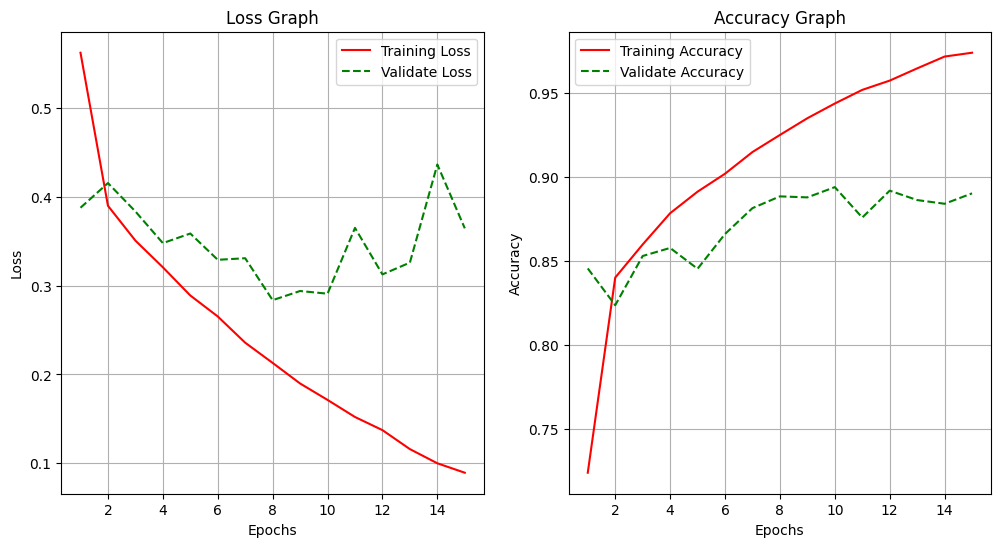

In [12]:
# Visualization of model training.
history = history.history

x = range(1, len(history['loss']) + 1)

fig, axs = plt.subplots(ncols=2,figsize=(12,6))

axs[0].plot(x,history['loss'],'r',label='Training Loss')
axs[0].plot(x,history['val_loss'],'g--',label='Validate Loss')

axs[0].set_title('Loss Graph')
axs[0].set_ylabel('Loss')
axs[0].set_xlabel('Epochs')
axs[0].legend()
axs[0].grid()

axs[1].plot(x,history['acc'],'r',label='Training Accuracy')
axs[1].plot(x,history['val_acc'],'g--',label='Validate Accuracy')

axs[1].set_title('Accuracy Graph')
axs[1].set_ylabel('Accuracy')
axs[1].set_xlabel('Epochs')
axs[1].legend()
axs[1].grid()

plt.show()

In [32]:
# Model testing.
dbrnn_lstm_scores = model.evaluate(x_test,y_test,return_dict=True)

469/469 ━━━━━━━━━━━━━━━━━━━━ 17s 33ms/step - acc: 0.8931 - loss: 0.2931


In [ ]:
# Model saving.
model.save('./dbrnn_lstm.h5')

## Comparison of models.

In [34]:
all_results = {
               'RNN':rnn_scores,
               'RNN LSTM':rnn_lstm_scores,
               'BRNN LSTM':brnn_lstm_scores,
               'DBRNN LSTM':dbrnn_lstm_scores
               }

all_loss = []
all_acc = []
for model_name, scores in all_results.items():
    all_loss.append(scores['loss'])
    all_acc.append(scores['acc'])
    print(f'{model_name}:\n'
          f'Loss: {all_loss[-1]:.5f}\n'
          f'Accuracy: {all_acc[-1]:.2%}\n')

RNN:
Loss: 0.37135
Accuracy: 87.91%

RNN LSTM:
Loss: 0.32133
Accuracy: 88.66%

BRNN LSTM:
Loss: 0.27575
Accuracy: 89.53%

DBRNN LSTM:
Loss: 0.29443
Accuracy: 89.13%



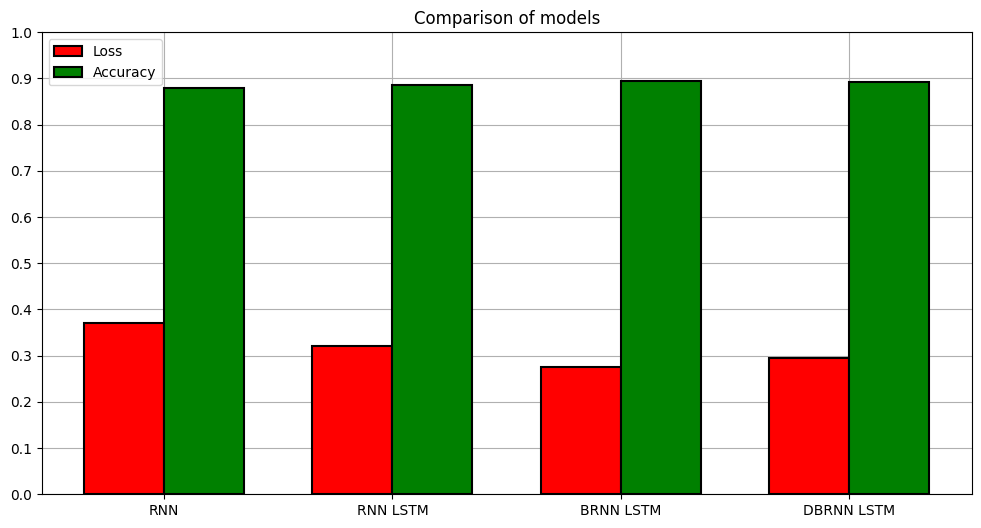

In [36]:
# Visualization of model results.

x_labels = list(all_results.keys())
x = np.arange(len(all_results))
width = 0.35

plt.figure(figsize=(12,6))

plt.bar(x - width / 2, all_loss,color='red',width=width,edgecolor='black',linewidth=1.5,label='Loss',zorder=2)
plt.bar(x + width / 2,all_acc,width=width,color='green',edgecolor='black',linewidth=1.5,label='Accuracy',zorder=2)

plt.title('Comparison of models')
plt.xticks(x,x_labels)
plt.yticks(np.linspace(0,1,11))

plt.legend()
plt.grid(zorder=1)
plt.show()

## Conclusion


### **English**:

---

In this project, we compared the performance of different recurrent neural network architectures (RNN, RNN with LSTM, BRNN with LSTM, and DBRNN with LSTM) to classify movie reviews as positive or negative using the IMDB dataset. The results showed that:

- **RNN** achieved an accuracy of **87.91%** but had the highest loss (**0.37135**).
- **RNN with LSTM** improved accuracy to **88.66%** and reduced loss to **0.32133**.
- **BRNN with LSTM** achieved the best accuracy of **89.53%** and the lowest loss (**0.27575**).
- **DBRNN with LSTM**, while slightly less accurate than BRNN (**89.13%**), still demonstrated competitive performance with a loss of **0.29443**.

The analysis highlights that bidirectional models generally outperform unidirectional ones, and deeper architectures do not always lead to better performance, depending on the regularization and dropout strategies used.  

### **Ukrainian**:

---


У цьому проєкті ми порівняли ефективність різних архітектур рекурентних нейронних мереж (RNN, RNN з LSTM, BRNN з LSTM та DBRNN з LSTM) для класифікації кінорецензій як позитивних чи негативних, використовуючи датасет IMDB. Результати показали, що:

- **RNN** досягла точності **87.91%**, але мала найвищий рівень втрат (**0.37135**).
- **RNN з LSTM** покращила точність до **88.66%** та зменшила втрати до **0.32133**.
- **BRNN з LSTM** досягла найкращої точності **89.53%** та найменших втрат (**0.27575**).
- **DBRNN з LSTM**, хоча й мала трохи нижчу точність, ніж BRNN (**89.13%**), продемонструвала конкурентоздатні результати з рівнем втрат **0.29443**.

Аналіз підкреслює, що двонаправлені моделі загалом перевершують однонаправлені, а глибші архітектури не завжди покращують результати, залежно від використаних стратегій регуляризації та дропауту.